# Portfolio & Risk Management I

### Autumn 2024

## Homework #4: Dimensional Fund Advisors

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Function that returns the time-series model's parameters and annualized statistics for multiple assets and factors
def LFPM_TS(assets, factors, annualize = 12, name = 'asset', treynor = False, mkt_name = 'MKT'):
    
    if isinstance(assets,pd.Series):
        assets = pd.DataFrame(assets,columns=name)
    
    model_output = pd.DataFrame()
    stats_output = pd.DataFrame()
    
    x = sm.add_constant(factors)
    
    for asset in assets.columns:
        
        y = assets[asset]
        model = sm.OLS(y,x).fit()
        
        model_output[asset] = model.params
        
        mu = y.mean() * annualize
        alpha = model.params[0] * annualize
        sig_ep = model.resid.std() * np.sqrt(annualize)
        IR = alpha / sig_ep
        
        stats_output[asset] = pd.Series(data = [alpha,IR],index = ['Alpha','IR'])
        
        if treynor:
            mkt = model.params[mkt_name]
            TR = mu / mkt
            
            stats_output.loc['Treynor',asset] = TR
        
    return model_output, stats_output


# Function that returns the cross-sectional model: we regress the means on the betas, with each asset as a data point
def LFPM_CS(assets, factors, intercept = True, annualize = 12):
    
    coef = LFPM_TS(assets,factors,annualize)[0]
    
    y = assets.mean() * annualize
    x = coef.drop('const').transpose()
    
    if intercept:
        x = sm.add_constant(x)

    model = sm.OLS(y,x).fit()
    
    return model

## Section 1: DFA's Strategy

### 1.1

__*(a)*__ DFA began with the belief that small/micro-cap equities provided opportunity, and this belief stemmed from academic research (Banz and later Fama and French) as well as the lack of small-cap related products in the market at the time. This belief was then coupled with the idea that value (high book to market ratio) stocks outperform due to their additional risk. In short, DFA (as an efficient market advocate) believes that excess returns in the market are earned by bearing risk. These risks (and their premia) are not always understood, and DFA believes that sound academic research can allow them to properly measure, evaluate, and take risk.

__*(b)*__ DFA's strategy relies primarily on their belief in the efficiency of markets. This idea asserts that any and all information has already been incorporated into market prices, and thus no one can consistently outperform for long periods of time. DFA believes in delivering the right form of risk and earning a premium from that. This means that they do not rely on individual equity analysis or macroeconomic strategies.

__*(c)*__ DFA pursues index-like strategies that are bolstered by active management. In this sense, they were positioned between an index fund and an active manager.

__*(d)*__ A "value" stock, defined generally, is a stock with a high book to market ratio. A "growth" stock is just the opposite. In other words, the value of the firm's net assets is more aligned with its market value for value stocks than for growth stocks. Typically, the idea of value is associated with a low price relative to some firm fundamentals (earnings, book value, EBITDA, etc.). On the other hand, growth is associated with a "loftier" valuation with respect to these measures.

### 1.2

__*(a)*__ Founded in 1981 with a focus on small-cap, DFA was challenged by market characteristics over the next two decades. The early 1980s saw the US enter a deep recession that particularly dragged on small companies, even long after the economy recovered. In essence, the reward for bearing the "size factor" risk was unattractive.

__*(b)*__ In the 1990s growth stocks significantly outperformed value, which was DFA's other focus.

### 1.3

__*(a)*__ Large Cap stocks account for ~70% of the overall market, with 207 companies at the time.

__*(b)*__ As indicated by Fama and French, it is possible that there are risk factors other than market beta. In other words, an investor can generate returns by assuming risk other than market risk. If it is true that one can harvest premia from non-market-related risks then the CAPM will fail to capture these dynamics and can mislead investors significantly. The US HML may represent one of these risks that an investor can be compensated for.

## Section 2: The Factors

In [5]:
factors = pd.read_excel('dfa_analysis_data.xlsx',sheet_name='factors',index_col='Date')
data = factors.drop('RF',axis = 1)

### 2.1

In [6]:
# Create function to retrieve common statistics
def stats_mean_vol_sharpe(data,portfolio = None,portfolio_name = 'Portfolio',annualize = 12):
    
    if portfolio is None:
        returns = data
    else:
        returns = data @ portfolio
    
    output = returns.agg(['mean','std'])
    output.loc['sharpe'] = output.loc['mean'] / output.loc['std']
    
    output.loc['mean'] *= annualize
    output.loc['std'] *= np.sqrt(annualize)
    output.loc['sharpe'] *= np.sqrt(annualize)
    
    if portfolio is None:
        pass
    else:
        output.columns = [portfolio_name]
    
    return output

In [7]:
# Set VaR quantile
pi = 0.05

__Beginning to 1980:__

In [8]:
# Historic VaR or normally distributed VaR?

In [9]:
data_beg_to_1980 = data.loc[:'1980']
_ = data_beg_to_1980.quantile(pi).rename('VaR')

stats_beg_to_1980 = stats_mean_vol_sharpe(data_beg_to_1980)
stats_beg_to_1980.loc['VaR'] = _
stats_beg_to_1980

,Mkt-RF,SMB,HML
mean,0.081138,0.033985,0.049479
std,0.205050,0.114568,0.133825
sharpe,0.395696,0.296638,0.369727
VaR,-0.083985,-0.043400,-0.042910


__1981 to 2001:__

In [10]:
data_1981_to_2001 = data.loc['1981':'2001']
_ = data_1981_to_2001.quantile(pi).rename('VaR')

stats_1981_to_2001 = stats_mean_vol_sharpe(data_1981_to_2001)
stats_1981_to_2001.loc['VaR'] = _
stats_1981_to_2001

,Mkt-RF,SMB,HML
mean,0.077257,-0.000862,0.063776
std,0.157396,0.118346,0.111183
sharpe,0.490847,-0.007283,0.573612
VaR,-0.064545,-0.046515,-0.041790


__2002 to End:__

In [11]:
data_2002_to_end = data.loc['2002':]
_ = data_2002_to_end.quantile(pi).rename('VaR')

stats_2002_to_end = stats_mean_vol_sharpe(data_2002_to_end)
stats_2002_to_end.loc['VaR'] = _
stats_2002_to_end

,Mkt-RF,SMB,HML
mean,0.089488,0.011007,0.000538
std,0.154644,0.088944,0.107348
sharpe,0.578674,0.123757,0.005014
VaR,-0.078735,-0.039070,-0.041245


### 2.2

__*(a)*__ The market has a positive expected return in each subsample, as did HML. However this is not the case for SMB where returns were negative for the period from 1981 to 2001.

__*(b)*__ The premium of the size factor (SMB) fell after 1980, and slightly rose again from 2002 and on. This reflects the case narrative, in which small stocks suffered as a result of the 1980s recession. It is important to note that Fama and French showed that this underperformance was more the result of poor fundamentals in smaller firms rather than them having "fallen out of favor" in the market. This seems to reinforce the notion that smaller stocks are riskier and should thus require a premium.

__*(c)*__ The premium of the value factor (HML) seemed to expand during the 1981 to 2001 period. However, this premium fell drastically, coinciding with the "dot com bubble". Since 2002, the excess returns have been almost negligible.

__*(d)*__ Since 2001, the size factor has been positive and the value factor has been very close to zero. Put otherwise, small cap has "outperformed" large cap and growth has performed equally as well as has value.

### 2.3

In [12]:
corr = data.corr()
corr.round(2)

,Mkt-RF,SMB,HML
Mkt-RF,1.00,0.31,0.23
SMB,0.31,1.00,0.12
HML,0.23,0.12,1.00


These correlations are somewhat far from being small, however in general the factors due indeed seem to be not very correlated (less than 50% in most cases). The correlation of the value and size factors is smallest, and the correlations of each factor to the market is slightly larger. We see these correlations vary quite significantly through the various subsamples, as seen in the following correlation matrices. We note that in general it is very difficult to find assets or portfolios that have lower (or negative) correlation with the market.

In [13]:
# First subsample
data_beg_to_1980.corr().round(2)

,Mkt-RF,SMB,HML
Mkt-RF,1.00,0.37,0.44
SMB,0.37,1.00,0.31
HML,0.44,0.31,1.00


In [14]:
# Second subsample
data_1981_to_2001.corr().round(2)

,Mkt-RF,SMB,HML
Mkt-RF,1.00,0.16,-0.53
SMB,0.16,1.00,-0.45
HML,-0.53,-0.45,1.00


In [15]:
# Third subsample
data_2002_to_end.corr().round(2)

,Mkt-RF,SMB,HML
Mkt-RF,1.00,0.31,0.13
SMB,0.31,1.00,0.13
HML,0.13,0.13,1.00


### 2.4

__1981 to 2001 Subsample:__

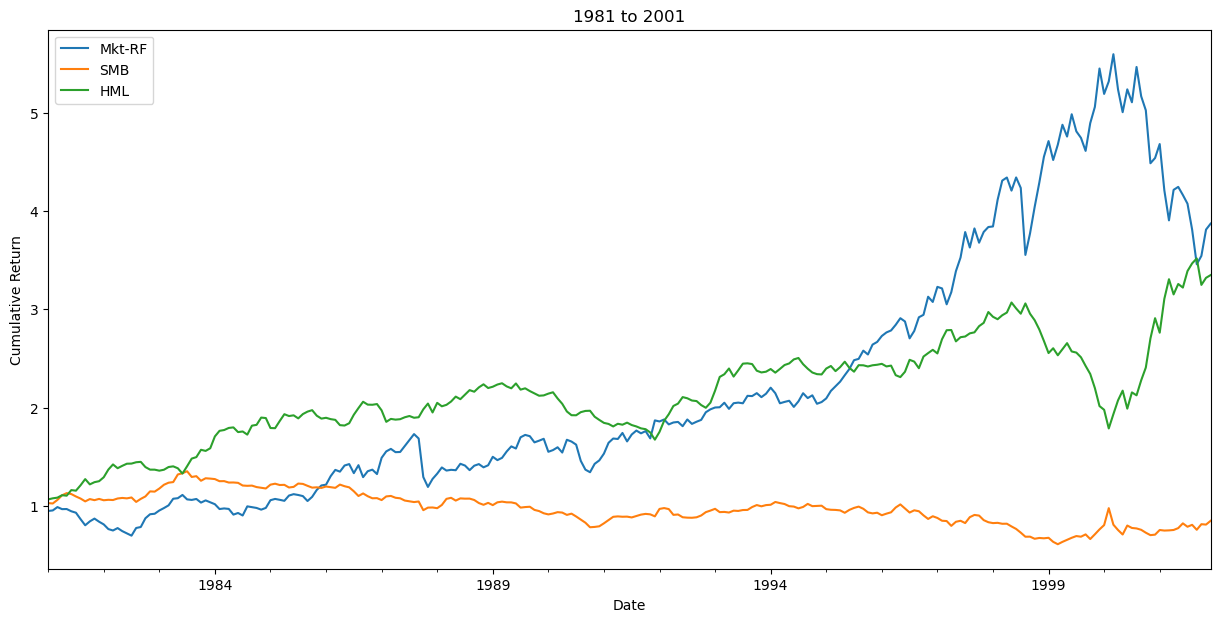

In [16]:
(data_1981_to_2001 + 1).cumprod().plot(figsize = (15, 7))
plt.title('1981 to 2001')
plt.ylabel('Cumulative Return')
plt.show()

__2002 to End Subsample:__

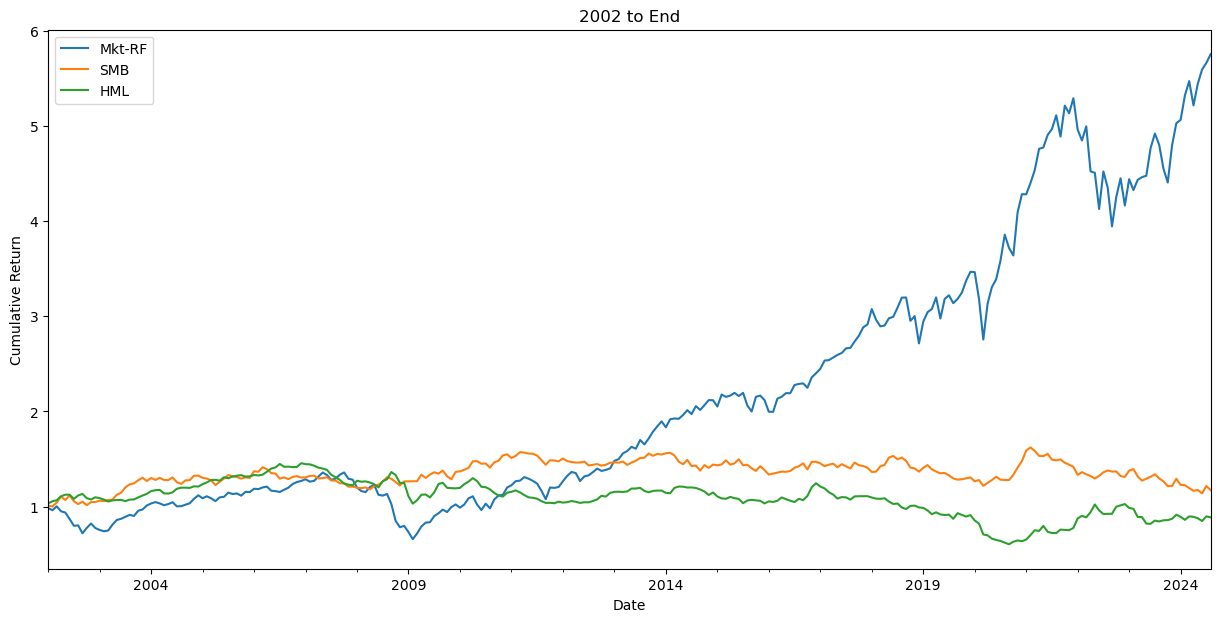

In [17]:
(data_2002_to_end + 1).cumprod().plot(figsize = (15, 7))
plt.title('2002 to End')
plt.ylabel('Cumulative Return')
plt.show()

### 2.5

In the period from 1981 to 2001 only the market and the growth factors provided significantly positive excess returns, and after 2001 really only the market factor provided positive excess returns. Based on this, one could argue that the "value" of these factors is a direct reflection of this, implying that only the market risk factor is consistently valuable. However, there are valid arguments against this conclusion. First, it is important to remember that these are *risk* factors, and they only generate excess *mean* returns as a result of their underlying risks. In other words, we cannot expect to always generate excess returns even if our risk premium (i.e. the *mean return*) is significantly positive. Furthermore, even if the premia associated with growth and size is far smaller than that of the market, it could still be attractive to get exposure to these risk factors.

## Section 3: CAPM

In [18]:
portfolios = pd.read_excel('dfa_analysis_data.xlsx',sheet_name='portfolios (total returns)',index_col='Date')
rfr = pd.read_excel('dfa_analysis_data.xlsx',sheet_name='factors',index_col='Date')[['RF']]

portfolios = portfolios.subtract(rfr['RF'],axis=0)
portfolios = portfolios.loc['1981':]

### 3.1

In [19]:
_ = portfolios.quantile(pi).rename('VaR')

stats_portfolios = stats_mean_vol_sharpe(portfolios)
stats_portfolios.loc['VaR'] = _
stats_portfolios.transpose()

,mean,std,sharpe,VaR
SMALL LoBM,0.006671,0.273771,0.024366,-0.126059
ME1 BM2,0.088689,0.236403,0.375163,-0.094747
ME1 BM3,0.092006,0.201252,0.457170,-0.086227
ME1 BM4,0.115998,0.194270,0.597099,-0.076972
SMALL HiBM,0.127838,0.210037,0.608646,-0.088535
ME2 BM1,0.058868,0.245156,0.240125,-0.104096
ME2 BM2,0.100515,0.205528,0.489059,-0.085661
ME2 BM3,0.105946,0.185777,0.570288,-0.078490
ME2 BM4,0.108835,0.182098,0.597670,-0.076138
ME2 BM5,0.115994,0.215616,0.537967,-0.096398


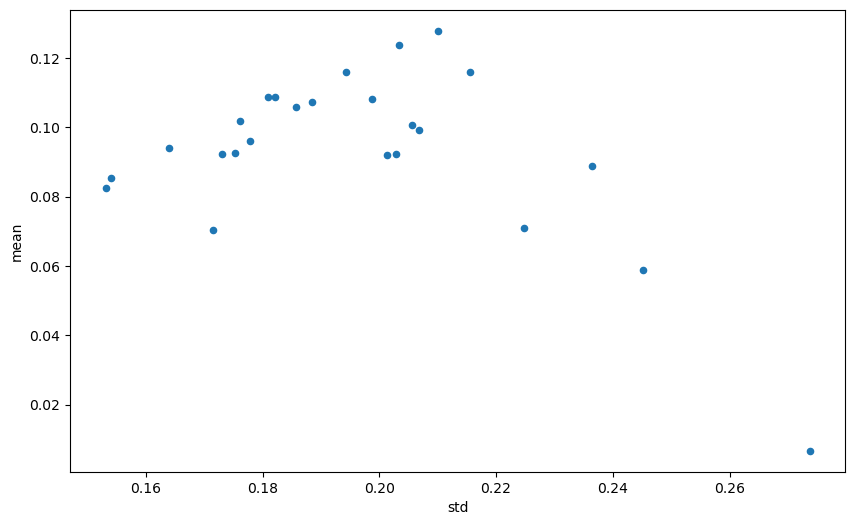

In [20]:
stats_portfolios.loc[['mean','std']].transpose().plot(kind = 'scatter',x='std',y='mean',figsize = (10, 6))
plt.show()

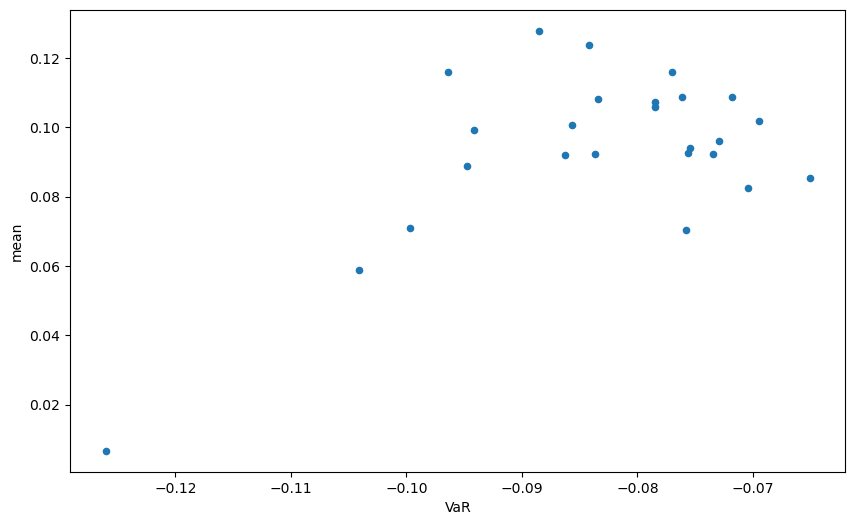

In [21]:
stats_portfolios.loc[['mean','VaR']].transpose().plot(kind = 'scatter',x='VaR',y='mean',figsize = (10, 6))
plt.show()

The above scatter plots show some interesting characteristics. First, we see that there certainly seems to be a relationship between mean excess returns and volatility. If this relationship were perfect, all of these portfolios would have equal sharpe ratios. We do note that there are certainly some outliers for which returns are low despite incredibly high volatility.

In the second scatter plot, the relationship is less clear, but generally we see that mean returns seem to decrease as VaR grows more positive. This, in a way, is saying something similar to the first plot: where we see more risk, we tend to see more return.

Still, we can see some large variation in these relationships, which could be a result of sampling or some other risk dynamics that could capture additional return discrepancies.

### 3.2

In [22]:
import statsmodels.api as sm

In [23]:
# Create a function to display regression statistics
# Pass series into y, dataframe or series into x
def statsmodel_statistics(model, y, x, intercept=True, annualize=12):
    
    if intercept:
        alpha = model.params.iloc[0] * annualize
        betas = model.params.iloc[1:]
    else:
        betas = model.params.iloc[0:]
    
    
    mu_y = y.mean() * annualize
    resid_std = model.resid.std() * np.sqrt(annualize)
    
    treynor_ratio = mu_y / betas
    information_ratio = alpha / resid_std
    
    output = model.params.to_frame(name='Coef')
    output['Treynor'] = treynor_ratio
    
    return alpha, information_ratio, output

__*(a), (b), (c), (d)*__

In [24]:
def LFPM_TS(assets, factors, annualize = 12, name = 'asset', treynor = False, mkt_name = 'Mkt-RF'):
    
    if isinstance(assets,pd.Series):
        assets = pd.DataFrame(assets,columns=name)
    
    model_output = pd.DataFrame()
    stats_output = pd.DataFrame()
    
    x = sm.add_constant(factors)
    
    for asset in assets.columns:
        
        y = assets[asset]
        model = sm.OLS(y,x).fit()
        
        model_output[asset] = model.params
        
        mu = y.mean() * annualize
        alpha = model.params.iloc[0] * annualize
        sig_ep = model.resid.std() * np.sqrt(annualize)
        IR = alpha / sig_ep
        
        stats_output[asset] = pd.Series(data = [alpha,IR],index = ['Alpha','IR'])
        
        if treynor:
            mkt = model.params[mkt_name]
            TR = mu / mkt
            
            stats_output.loc['Treynor',asset] = TR
        
    return model_output, stats_output

In [25]:
capm_ts_reg_stats = pd.concat(LFPM_TS(portfolios,data['Mkt-RF'].loc['1981':], treynor=True)).T
print(f"MAE: {capm_ts_reg_stats['const'].abs().mean():.4f}")
print(f"MAE (Annualized): {capm_ts_reg_stats['Alpha'].abs().mean():.4f}")
capm_ts_reg_stats

MAE: 0.0019
MAE (Annualized): 0.0224


,const,Mkt-RF,Alpha,IR,Treynor
SMALL LoBM,-0.008894,1.356365,-0.106730,-0.613409,0.004918
ME1 BM2,-0.000731,1.165744,-0.008774,-0.057999,0.076080
ME1 BM3,0.000385,1.045218,0.004620,0.039081,0.088026
ME1 BM4,0.002891,0.972450,0.034696,0.285425,0.119285
SMALL HiBM,0.003721,0.994979,0.044652,0.315148,0.128483
ME2 BM1,-0.004421,1.338627,-0.053049,-0.411917,0.043976
ME2 BM2,0.000469,1.134902,0.005631,0.053775,0.088568
ME2 BM3,0.001662,1.028607,0.019949,0.212415,0.103000
ME2 BM4,0.002279,0.974696,0.027344,0.272232,0.111660
ME2 BM5,0.001902,1.114415,0.022822,0.178588,0.104085


If CAPM were true, the Treynor Ratios would necessarily be constant and equal to the expected market premium. Alphas would also be equal to zero, which in turn would make the information ratio zero as well as the MAE.

### 3.3

In [26]:
mu_tilde_portfolios = portfolios.mean()
mkt_betas_portfolios = capm_ts_reg_stats['Mkt-RF']

y = mu_tilde_portfolios
x = sm.add_constant(mkt_betas_portfolios)

model_cross_sectional = sm.OLS(y,x).fit()

In [27]:
print(model_cross_sectional.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     9.883
Date:                Mon, 28 Oct 2024   Prob (F-statistic):            0.00455
Time:                        19:17:06   Log-Likelihood:                 124.45
No. Observations:                  25   AIC:                            -244.9
Df Residuals:                      23   BIC:                            -242.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0174      0.003      5.678      0.0

__*(a), (b), (c)*__ The $R^{2}$ of this regression is 0.301. The intercept, $\eta$, is ~0.0174. The regression coefficient, $\lambda_{m}$, is -0.009.

In general, if CAPM were true, we should find a few things. First, the $R^{2}$ should be extremely high, as our dependent variable (portfolio *mean* returns) should be explained entirely by the level of market risk taken on (the $\beta$ we estimated in the prior regressions), which is our regressor in this case. In addition, the coefficient $\lambda_{m}$ should equal the market premium. Lastly, the intercept term should be 0, reflecting that one should not get any excess mean returns if they take no market risk.

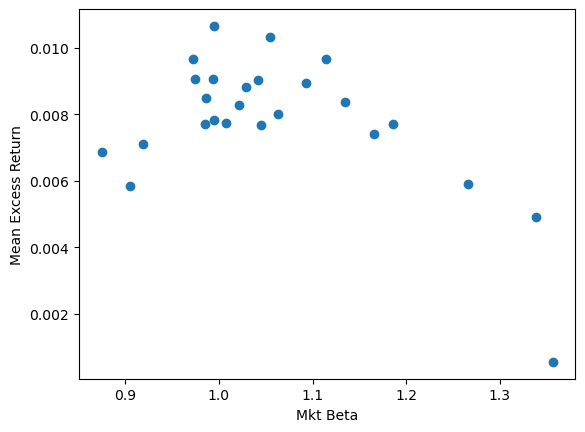

In [28]:
plt.scatter(x=mkt_betas_portfolios, y=mu_tilde_portfolios); plt.xlabel('Mkt Beta'); plt.ylabel('Mean Excess Return'); plt.show()

### 3.4

Broadly speaking, yes, these results indicate that there exists some risk factors that CAPM may have failed to capture. Our previous results indicate that size and value may be two examples of these risk factors.

## Section 4: Extensions

### 4.1

In [31]:
# Create function to calculate sigma, sigma_inv, n, and mu_tilde
def get_symbols(data, diagonalize = False):
    
    sigma = data.cov()
    
    if diagonalize == True:
        sigma = np.diag(np.diag(sigma))
    
    sigma_inv = np.linalg.inv(sigma)
    n = sigma.shape[0]
    mu = data.mean().to_numpy().reshape((n,1))
    
    return sigma, sigma_inv, n, mu

# Create function to compute and return the tangency portfolio weights
def compute_tangency(data, diagonalize = False):
    
    sigma, sigma_inv, n, mu = get_symbols(data,diagonalize)
    
    ones = np.ones((n,1))
    
    portfolio = (sigma_inv @ mu) / (ones.transpose() @ sigma_inv @ mu)
    
    return portfolio

In [40]:
in_sample_tangency = (portfolios @ compute_tangency(portfolios)).iloc[:, 0].rename('tangency')

In [43]:
tangency_reg_stats = pd.concat(LFPM_TS(portfolios, in_sample_tangency, treynor=True, mkt_name='tangency')).T
print(f"MAE: {tangency_reg_stats['const'].abs().mean():.4f}")
print(f"MAE (Annualized): {tangency_reg_stats['Alpha'].abs().mean():.4f}")
tangency_reg_stats

MAE: 0.0000
MAE (Annualized): 0.0000


,const,tangency,Alpha,IR,Treynor
SMALL LoBM,-3.212762e-16,0.017416,-3.855315e-15,-1.408351e-14,0.383026
ME1 BM2,-3.091331e-16,0.231549,-3.709598e-15,-1.602628e-14,0.383026
ME1 BM3,-2.352719e-16,0.240209,-2.823262e-15,-1.447953e-14,0.383026
ME1 BM4,-1.871333e-16,0.302847,-2.245600e-15,-1.221577e-14,0.383026
SMALL HiBM,-1.947634e-16,0.333758,-2.337160e-15,-1.178637e-14,0.383026
ME2 BM1,-3.440106e-16,0.153692,-4.128127e-15,-1.698307e-14,0.383026
ME2 BM2,-2.225096e-16,0.262425,-2.670116e-15,-1.347282e-14,0.383026
ME2 BM3,-2.126934e-16,0.276604,-2.552320e-15,-1.444513e-14,0.383026
ME2 BM4,-1.774432e-16,0.284144,-2.129319e-15,-1.235882e-14,0.383026
ME2 BM5,-1.784461e-16,0.302836,-2.141354e-15,-1.038193e-14,0.383026


We note that the intercept term is 0, and although the betas of each portfolio to the tangency portfolio differ we find that their Treynor ratios are all the same! This is exactly what we would expect to find if this model was valid. So is this model valid? No, because we want this to work *out of sample*.

Now, we can move on to the cross-sectional regression.

In [44]:
tangency_betas_portfolios = tangency_reg_stats['tangency']

y = mu_tilde_portfolios
x = sm.add_constant(tangency_betas_portfolios)

model_cross_sectional_tangency = sm.OLS(y, x).fit()

In [45]:
print(model_cross_sectional_tangency.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.791e+28
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          5.63e-313
Time:                        19:34:35   Log-Likelihood:                 899.52
No. Observations:                  25   AIC:                            -1795.
Df Residuals:                      23   BIC:                            -1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.185e-16   4.83e-17     -6.593      0.0

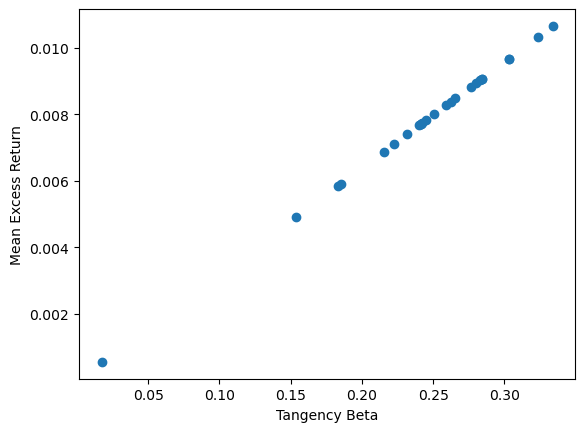

In [46]:
plt.scatter(x=tangency_betas_portfolios, y=mu_tilde_portfolios); plt.xlabel('Tangency Beta'); plt.ylabel('Mean Excess Return'); plt.show()

The cross-sectional regression validates what we previously discovered -- the model is a perfect fit. Again, we care to have a high $R^2$ value and an intercept equal to zero.

### 4.2

In [53]:
ff3_reg_stats = pd.concat(LFPM_TS(portfolios, factors[['Mkt-RF', 'SMB', 'HML']].loc['1981':], treynor=True, mkt_name='Mkt-RF')).T
print(f"MAE: {ff3_reg_stats['const'].abs().mean():.4f}")
print(f"MAE (Annualized): {ff3_reg_stats['Alpha'].abs().mean():.4f}")
ff3_reg_stats

MAE: 0.0012
MAE (Annualized): 0.0145


,const,Mkt-RF,SMB,HML,Alpha,IR,Treynor
SMALL LoBM,-0.007151,1.111846,1.392517,-0.253788,-0.085811,-0.937530,0.006000
ME1 BM2,0.000120,0.965456,1.317675,-0.014432,0.001435,0.020344,0.091863
ME1 BM3,0.000050,0.923142,1.065113,0.277445,0.000595,0.011988,0.099666
ME1 BM4,0.001849,0.877818,1.065753,0.477399,0.022184,0.467283,0.132144
SMALL HiBM,0.001921,0.929787,1.066006,0.691417,0.023053,0.312014,0.137492
ME2 BM1,-0.002702,1.141897,1.023281,-0.310250,-0.032422,-0.539477,0.051553
ME2 BM2,0.000596,1.013778,0.915858,0.121287,0.007150,0.141210,0.099149
ME2 BM3,0.000721,0.973977,0.719244,0.389224,0.008658,0.165561,0.108777
ME2 BM4,0.000698,0.941288,0.748332,0.575080,0.008373,0.186100,0.115623
ME2 BM5,-0.000481,1.089194,0.929779,0.832768,-0.005771,-0.124297,0.106495


The intercept terms (and MAE) are much smaller than we found previously (when testing CAPM). The Treynor ratio, which in this case is still only with respect to the market betas, still differs across assets. Note that the interpretation of Treynor ratio is different now that we have multiple factors.

In [54]:
ff3_betas_portfolios = ff3_reg_stats[['Mkt-RF', 'SMB', 'HML']]

y = mu_tilde_portfolios
x = sm.add_constant(ff3_betas_portfolios)

model_cross_sectional_ff3 = sm.OLS(y, x).fit()

In [55]:
print(model_cross_sectional_ff3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     6.030
Date:                Mon, 28 Oct 2024   Prob (F-statistic):            0.00396
Time:                        19:45:53   Log-Likelihood:                 127.75
No. Observations:                  25   AIC:                            -247.5
Df Residuals:                      21   BIC:                            -242.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.005      3.412      0.0

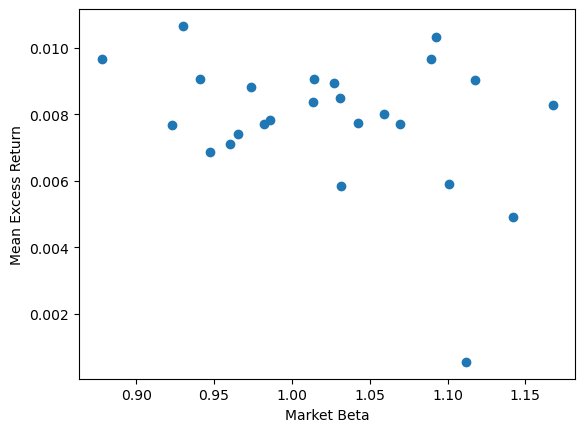

In [56]:
plt.scatter(x=ff3_betas_portfolios['Mkt-RF'], y=mu_tilde_portfolios); plt.xlabel('Market Beta'); plt.ylabel('Mean Excess Return'); plt.show()

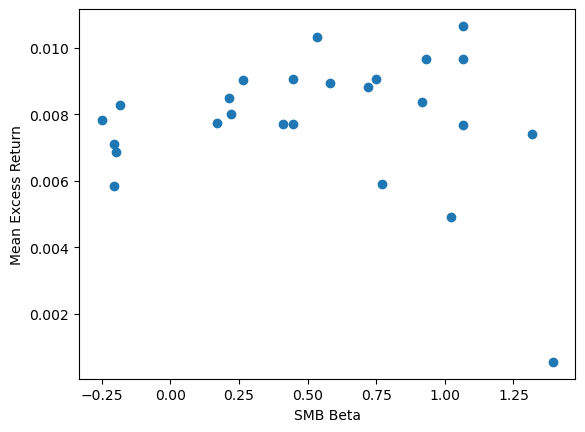

In [57]:
plt.scatter(x=ff3_betas_portfolios['SMB'], y=mu_tilde_portfolios); plt.xlabel('SMB Beta'); plt.ylabel('Mean Excess Return'); plt.show()

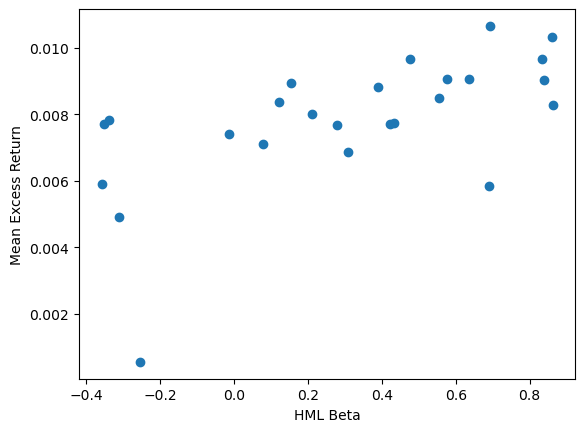

In [58]:
plt.scatter(x=ff3_betas_portfolios['HML'], y=mu_tilde_portfolios); plt.xlabel('HML Beta'); plt.ylabel('Mean Excess Return'); plt.show()

The FF3 model improves the CAPM marginally as shown by the higher $R^2$ and the slightly smaller intercept term. Even so, it appears there are some dynamics that this model is not capturing, at least in our given sample.

### 4.3

In [73]:
from scipy import stats

In [77]:
alpha_vec = pd.Series()
epsilon_mtx = pd.DataFrame()

x = sm.add_constant(factors['Mkt-RF']).loc['1981':]

for port in portfolios.columns:
    
    y = portfolios[port]
    
    model = sm.OLS(y, x).fit()
    alpha = model.params.iloc[0]
    epsilon = model.resid
    
    alpha_vec[port] = alpha
    epsilon_mtx[port] = epsilon
    
market_sharpe = factors['Mkt-RF'].mean() / factors['Mkt-RF'].std()

T = y.shape[0]
sigma = epsilon_mtx.cov()

H = T * (1 + market_sharpe ** 2) ** (-1) * (alpha_vec.T @ np.linalg.inv(sigma) @ alpha_vec)
pvalue = 1 - stats.chi2.cdf(H, df=25)

print(f'{H = :.4f}')
print(f'{pvalue = :.4f}')

H = 136.8980
pvalue = 0.0000


__*(a)*__ The stricter test is checking whether $H$ is significant. This is reflected by our findings as well, wherein we most of the alphas are not are not significant on their own (evidence that CAPM holds) while the H statistic indicates CAPM does not hold.

__*(b)*__ Conceptually, we are checking to what extent the alphas (which are the mean returns that the factors *cannot explain*) capture the MV characteristics of the portfolios compared to the risk factor. In "totality", the MV characteristics are given by the tangency portfolio. As such, alpha values of zero would imply that the risk factor completely captures everything (implying the risk factor *is* the tangency portfolio) and alpha values that are non-zero would imply that the risk factor does not capture it. In other words, we are assessing whether the risk factors replicate (or span) our tangency portfolio.